In [9]:
import math
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd


import numpy as np

matplotlib.rcParams.update({'font.size': 14})

In [10]:
naive_nat = []
quic_nat = []
quic_offline_nat = []


with open("default_latency_data.txt") as f:
    latency = f.readlines()
    for t in latency:
        t = t.strip()
        t = int(t)/1e6
        naive_nat.append(int(t))

with open("online_latency_data.txt") as f:
    latency = f.readlines()
    for t in latency:
        t = t.strip()
        t = int(t)/1e6
        quic_nat.append(int(t))

with open("offline_latency_data.txt") as f:
    latency = f.readlines()
    for t in latency:
        t = t.strip()
        t = int(t)/1e6
        quic_offline_nat.append(int(t))

In [11]:
len(naive_nat), len(quic_nat), len(quic_offline_nat)

(1001, 1001, 1001)

In [12]:
avg_naive_nat = sum(naive_nat) / len(naive_nat)
avg_naive_nat

43.71628371628372

In [13]:
avg_quid_nat = sum(quic_nat) / len(quic_nat)
avg_quid_nat


37.9020979020979

In [14]:
avg_quic_offline_nat = sum(quic_offline_nat) / len(quic_offline_nat)
avg_quic_offline_nat


35.884115884115886

/tmp/ipykernel_60264/74629742.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks)


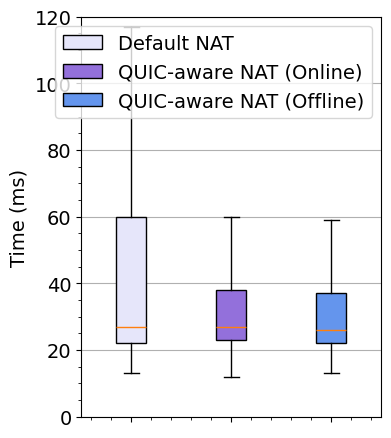

In [17]:

data = [naive_nat, quic_nat, quic_offline_nat]
 
fig = plt.figure(figsize =(3, 4))
 
# Creating axes instance
colors = ['lavender', 'mediumpurple', 'cornflowerblue']

ax = fig.add_axes([0, 0, 1, 1])

xticks = ["", "", ""]
ax.set_xticklabels(xticks)

ax.set_ylabel("Time (ms)")
ax.set_ylim([0, 120])
# # ax.set_yticks([100000])#
ax.grid(axis="y")
ax.tick_params(axis='y', which='minor', labelsize=11)

ax.minorticks_on()
bp = ax.boxplot(data, patch_artist=True, notch=False,showfliers=False, flierprops={'marker': 'o', 'markersize': 1, 'markerfacecolor': 'fuchsia'})
for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
labels = ["Default NAT", "QUIC-aware NAT (Online)", "QUIC-aware NAT (Offline)"]
ax.legend([bp["boxes"][0], bp["boxes"][1], bp["boxes"][2]], labels, loc="upper right")

plt.savefig('nat_latency_box.pdf',bbox_inches='tight', dpi=150)
plt.show()

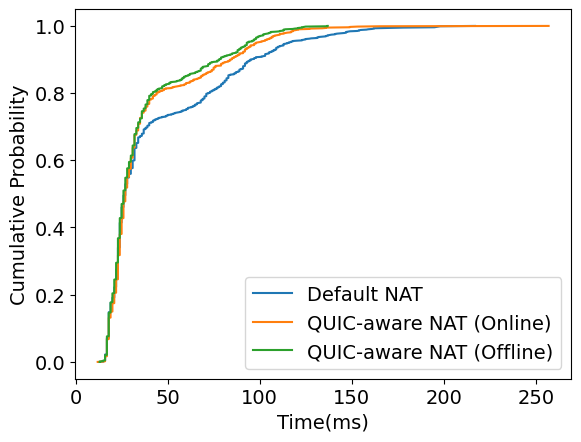

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline 
  
# No of data points used 
N = len(naive_nat)
    

    
# sort the data in ascending order 
naive_nat = np.sort(naive_nat)
quic_nat = np.sort(quic_nat) 
quic_nat_offline = np.sort(quic_offline_nat)
  
# get the cdf values of y 
y = np.arange(N) / float(N) 
  

plt.xlabel('Time(ms)') 
plt.ylabel('Cumulative Probability') 
  
# plt.title('CDF of Default NAT and QUIC-aware NAT') 
  
plt.plot(naive_nat, y) 
plt.plot(quic_nat, y)
plt.plot(quic_nat_offline, y)
plt.legend(["Default NAT", "QUIC-aware NAT (Online)", "QUIC-aware NAT (Offline)"])
plt.savefig('nat_latency_cdf.pdf',bbox_inches='tight', dpi=150)